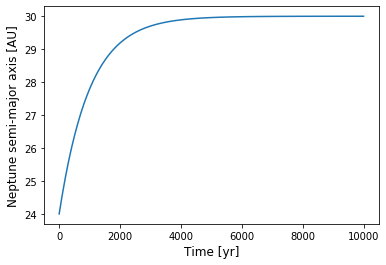

In [10]:
# Example for exponential_migration reboundx force
# It simulates a one planet system, with 'Neptune' starting at 24 AU around the sun,
#    then smoothly migrating outwards to 30 AU on a 1000 yr e-folding timescale. 
# The three migration force parameters are hence: em_aini (Neptune's initial a)
#                                                 em_afin (Neptune's final a)
#                                                 em_tau_a (Neptune's migration timescale)
# By: Mohamad Ali-Dib
#     mma9132@nyu.edu
#     See https://arxiv.org/abs/2104.04271
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt

neptune_a_array = []
time_array = []

sim = rebound.Simulation()  # Initiate rebound simulation
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=1)
sim.add(m=5.1e-5, a=24., e=0.01, hash="neptune") # Add Neptune (pre-migration) at 24 AU
sim.move_to_com()

rebx = reboundx.Extras(sim) # Initiate reboundx
mod_effect = rebx.load_force("exponential_migration")  # Add the migration force
rebx.add_force(mod_effect)  # Add the migration force
 
sim.particles[1].params["em_aini"] = 24.  # parameter 1: Neptune's initial semimajor axis
sim.particles[1].params["em_afin"] = 30.  # parameter 2: Neptune's final semimajor axis
sim.particles[1].params["em_tau_a"] = 1e3  # parameter 3: the migration e-folding time

for time in np.linspace(0, 1e4,100):   # Integrate the system for 1e4 yr
    sim.integrate(time)
    neptune_a_array.append(sim.particles[1].a)
    time_array.append(sim.t)


plt.plot(time_array,neptune_a_array ) # Plot
plt.xlabel(r'Time [yr]', fontsize=12)
plt.ylabel(r'Neptune semi-major axis [AU]', fontsize=12)

plt.show()